# Heart Diesease: Visualization and Prediction

### Dataset

https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    
<b> Context </b> </br>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Contents

1. Load the Data
2. Data Visualization
3. Feature Engineering
4. Prediction
    1. SVM
    2. Random Forest
    3. K-nearest Neighbor
    4. Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.shape

(303, 14)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Visualization

1    207
0     96
Name: sex, dtype: int64


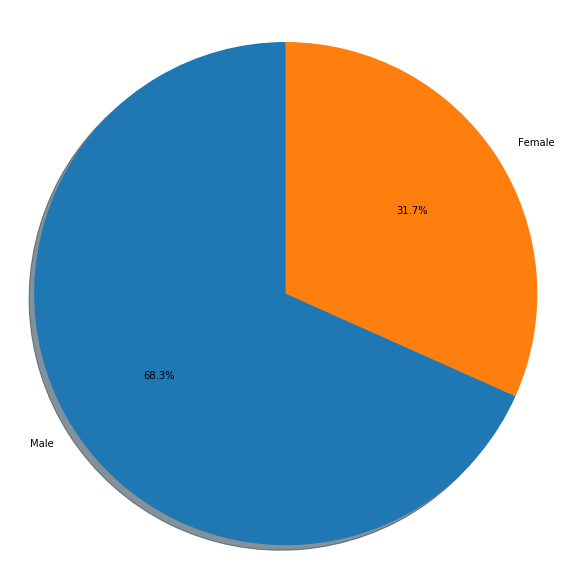

In [7]:
# male and female ratio
print(data.sex.value_counts())
labels = 'Male','Female'
colors = ['silver','firebrick']
sizes = [207,96]
explode = (0,0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title(" ")
plt.show()

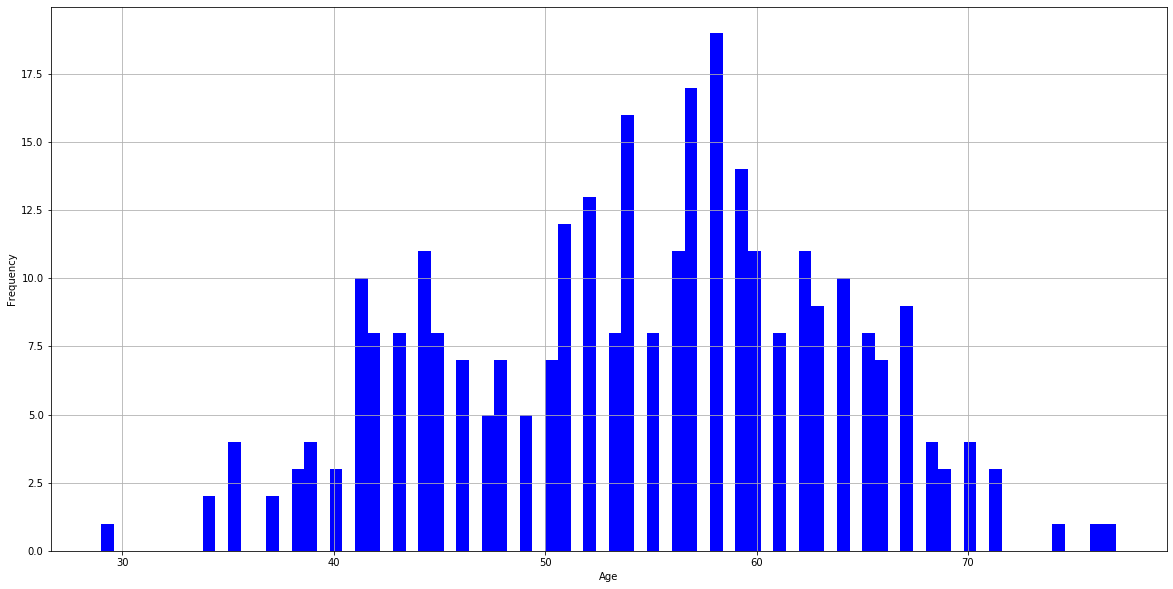

In [8]:
fig1, ax1 = plt.subplots(figsize=(20,10))
plt.hist(data.age, bins=80, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


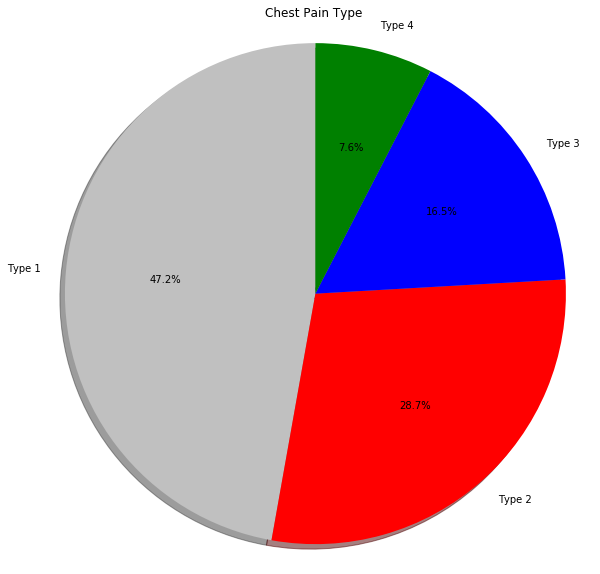

In [9]:
print(data.cp.value_counts())
labels = 'Type 1','Type 2','Type 3','Type 4'
explode = (0,0,0,0)
colors = ['silver','red','blue','green']
sizes = [143, 87,50,23]
fig,ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Chest Pain Type')
plt.show()

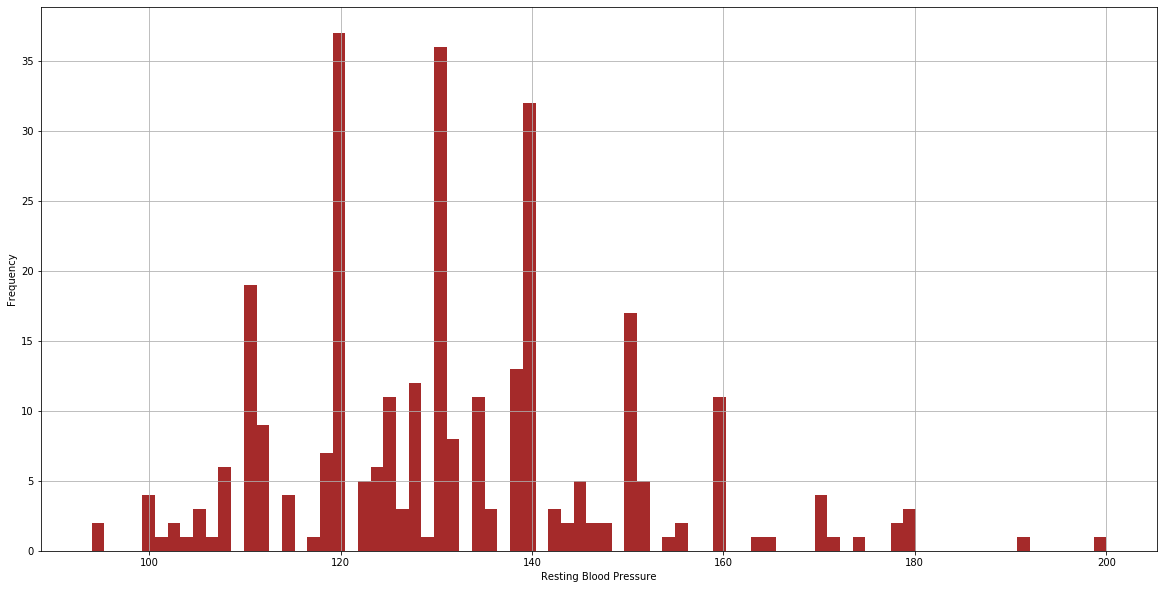

In [10]:
plt.figure(figsize=(20,10))
plt.hist(data.trestbps, bins=80, color='brown')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.grid()
plt.show()

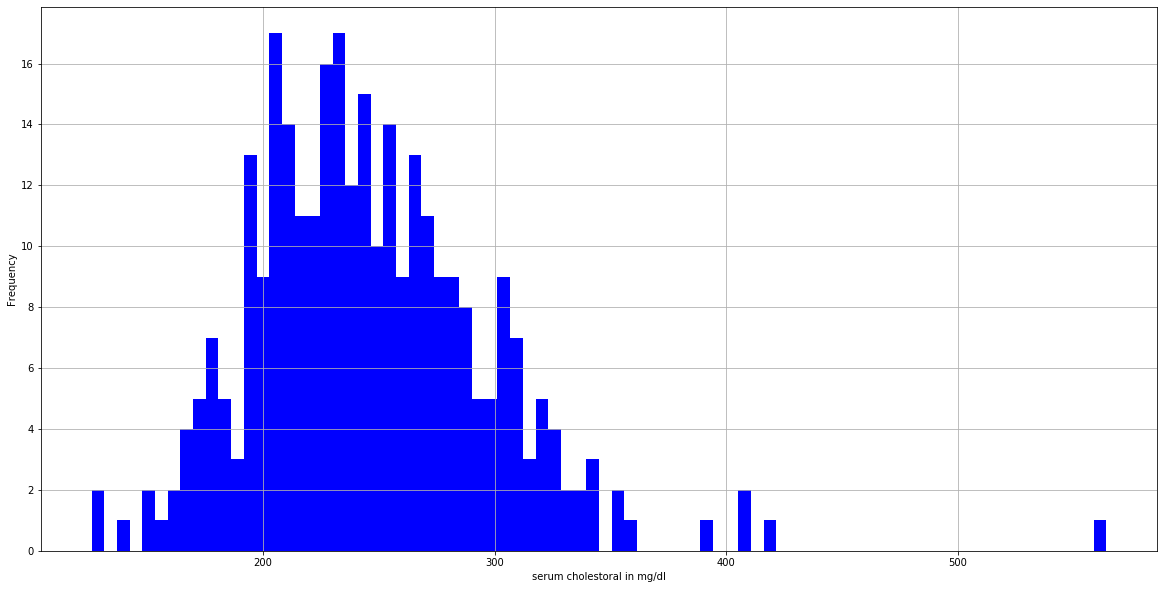

In [11]:
plt.figure(figsize=(20,10))
plt.hist(data.chol, bins=80, color='blue')
plt.xlabel("serum cholestoral in mg/dl")
plt.ylabel('Frequency')
plt.grid()
plt.show()

0    258
1     45
Name: fbs, dtype: int64


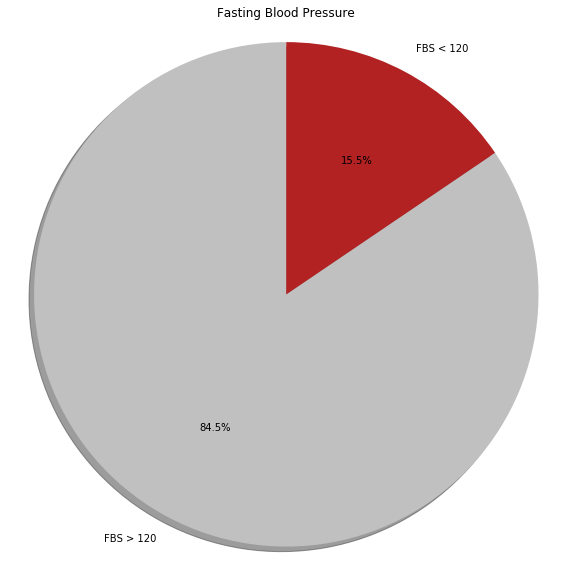

In [12]:
print(data.fbs.value_counts())
plt.figure(figsize=(10,10))
labels = 'FBS > 120', 'FBS < 120'
sizes = [245, 45]
explode = (0,0)
colors = ['silver','firebrick']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Fasting Blood Pressure')
plt.axis('equal')
plt.show()

1    152
0    147
2      4
Name: restecg, dtype: int64


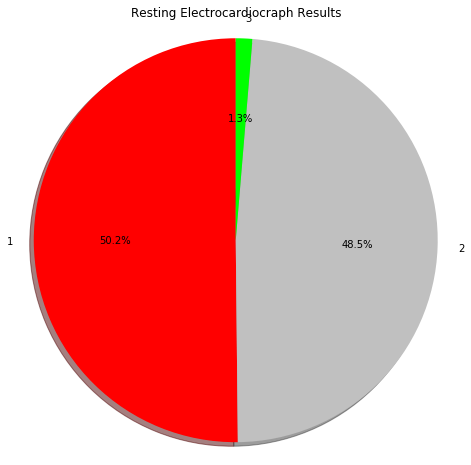

In [13]:
print(data.restecg.value_counts())
labels = '1','2','3'
sizes = [152,147, 4]
explode = (0,0,0)
colors = ['red','silver','lime']
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Resting Electrocardiocraph Results')
plt.axis('equal')
plt.show()

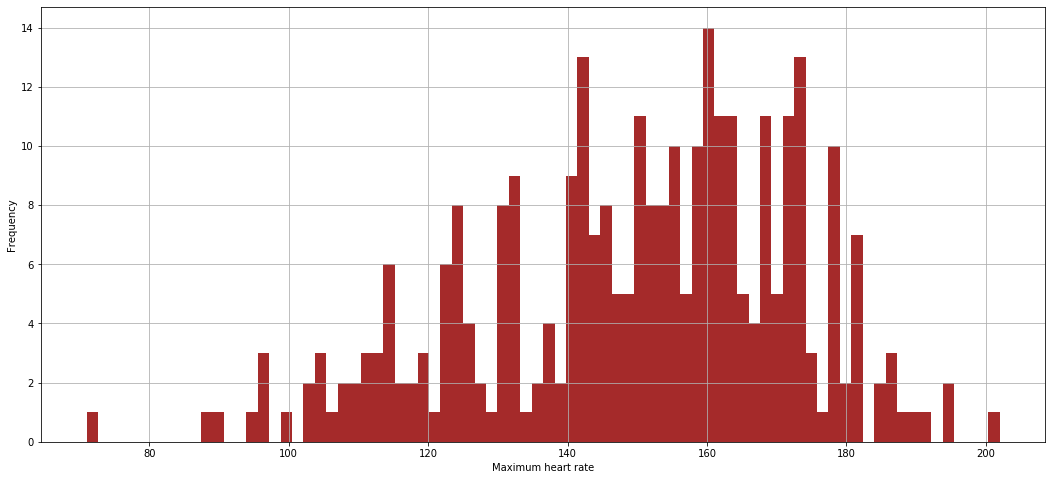

In [14]:
fig,ax = plt.subplots(figsize=(18,8))
plt.hist(data.thalach, bins=80, color='brown')
plt.xlabel('Maximum heart rate')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Feature Engineering

In [15]:
y = data.target
data.drop(['target'], axis=1, inplace=True)
data_copy = data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [17]:
data = pd.get_dummies(data, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
data

,age_29,age_34,age_35,age_37,age_38,age_39,age_40,age_41,age_42,age_43,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
299,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
x = (data-np.min(data)) / (np.max(data)-np.min(data))
x

,age_29,age_34,age_35,age_37,age_38,age_39,age_40,age_41,age_42,age_43,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Prediction

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

### 1. Support Vector Classification

In [20]:
from sklearn.svm import SVC

svm = SVC(gamma=0.1, C=1, kernel='rbf')
svm.fit(x_train, y_train)
svm_score = svm.score(x_test, y_test)
print('SVM Score: ', svm_score)

SVM Score:  0.8688524590163934


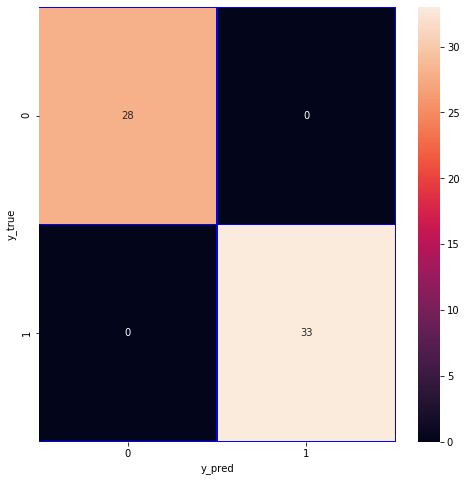

In [21]:
y_pred = svm.predict(x_test)
y_true = y_pred

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor='blue', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

### 2. K-nearest Neighbor

In [25]:
knn_list = []
from sklearn.neighbors import KNeighborsClassifier
for each in range(1,100):
    knn1 = KNeighborsClassifier(n_neighbors = each,weights = "distance",metric = "euclidean" )
    knn1.fit(x_train,y_train)
    knn1_score = knn1.score(x_test,y_test)
    knn_list.append(knn1_score)
knn_max = np.max(knn_list)
print("KNN Max Score = ",knn_max)

KNN Max Score =  0.8852459016393442


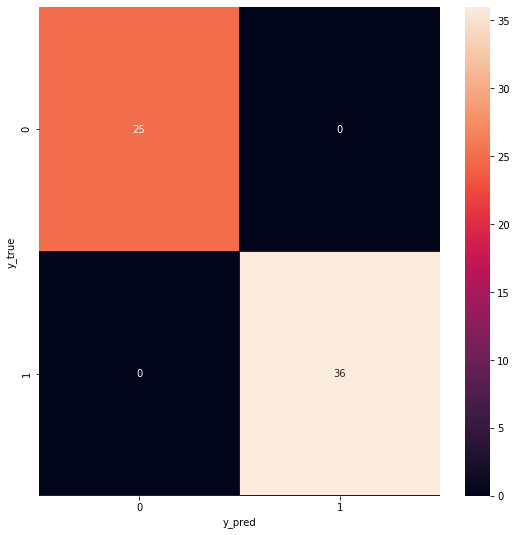

In [27]:
y_pred2 = knn.predict(x_test)
y_true2 = y_pred2

conf = confusion_matrix(y_true2, y_pred2)

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(conf, annot=True, linewidths=0.5, linecolor='blue', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

### 3. Random Forest Classification

In [28]:
score_list = []

from sklearn.ensemble import RandomForestClassifier

for each in range(1,100):
    rf = RandomForestClassifier(n_estimators=each, random_state=49, bootstrap=False,
                                criterion='gini', min_samples_split=2, min_samples_leaf=1)
    rf.fit(x_train, y_train)
    score_list.append(rf.score(x_test, y_test))
max_rf = np.max(score_list)
print("Random Forest Max Score: ",max_rf)

Random Forest Max Score:  0.8852459016393442


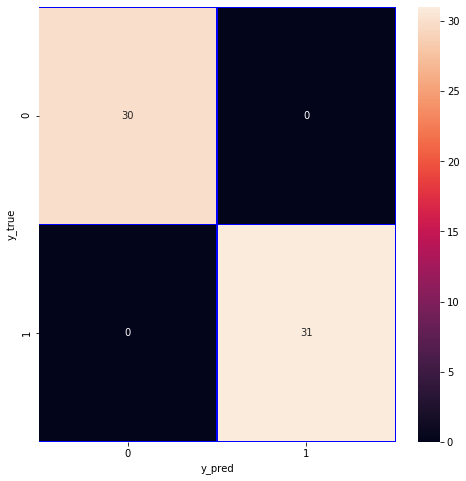

In [29]:
y_predict = rf.predict(x_test)
y_true3 = y_predict

confusion = confusion_matrix(y_true3, y_predict)

fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion, annot=True, linewidths=0.5, linecolor='blue', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

### 4. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 10.0, penalty='l2')
lr.fit(x_train,y_train)
lr_max = lr.score(x_test, y_test)
print("Logistic Regression Max Score: ",lr_max)

Logistic Regression Max Score:  0.7704918032786885


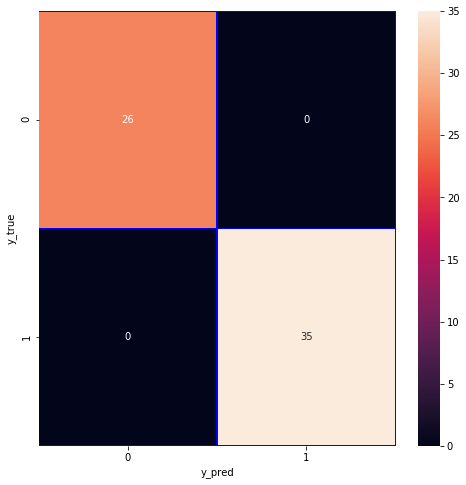

In [33]:
y_prediction = lr.predict(x_test)
y_ = y_prediction

conf_matrix = confusion_matrix(y_, y_prediction)

fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True, linecolor='blue', linewidths=0.5, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()